# Пространства имен

Вспомним как работает оператор присваивания (связывания):

```python
x = 'Hello World!'
```

Он создает связь между именем переменной `x` и значением в памяти `'Hello World!'`.

**Пространство имен** — это своего рода контейнер, в котором хранятся имена (идентификаторы) и связанные с ними объекты.

Python использует пространства имен для управления переменными и функциями, чтобы избежать конфликтов имен. В любой момент в программе могут существовать несколько переменных с одинаковыми именами, но если они находятся в разных пространствах имен, то они не будут конфликтовать друг с другом.

Проще говоря, Пространство имен - как большой словарь, где:

- **Ключи** - это имена переменных, функций и других идентификаторов
- **Значения** - это области памяти, куда эти идентификаторы относятся

**Зачем они нужны?** Позволяют использовать одинаковые имена в разных частях кода без путаницы.

Пространства имен - важный компонент Python, поэтому их упоминают и в `The Zen of Python`:

In [ ]:
import this

В Python выделяют 3 типа пространств имен::

- **Встроенные (Built-In)**
- **Глобальные (Global)**
- **Локальные (Local)**

## Встроенное пространство (Built-in)

Содержит имена встроенных функций и объектов.

Пример: `print`, `len`, `int` и т.д.

Посмотреть содержимое встроенного пространства - `dir(__builtins__)`:

In [ ]:
print(*dir(__builtins__), sep=', ')

Функция `dir` позволяет получить список атрибутов для объекта, подробнее - на следующем занятии.

- **Сколько может быть встроенных пространств?** - Только одно!
- **Когда создается?** - При запуске интерпретатора
- **Когда уничтожается?** - При завершении работы интерпретатора

## Глобальное пространство (Global)

Пространство имен для всего **модуля** (файла с расширением .py). Все переменные и функции, объявленные на верхнем уровне файла, находятся в глобальном пространстве имен для своего модуля.

Создадим несколько переменных:

In [ ]:
variable_a, variable_b, variable_c = 10, 20, 30

Посмотрим на глобальное пространство имен:

In [ ]:
print(*dir(), sep=', ')

А с другими модулями? Создадим свой модуль и импортируем его:

In [1]:
%%writefile -a my_module.py

doc_string = "This is a very important module for our project!"

def print_doc():
    print(doc_string)

Writing my_module.py


Импортируем функцию `print_doc` и вызовем ее:

In [2]:
from my_module import print_doc

print_doc()

This is a very important module for our project!


Функция `print_doc` видит глобальную переменную `doc_string` в модуле `my_module` и использует ее. В самом ноутбуке такой переменной нет:

In [4]:
doc_string = 42

In [3]:
doc_string

NameError: name 'doc_string' is not defined

- **Сколько может быть глобальных пространств?** - Много, по количеству импортируемых модулей.
- **Когда создается?** - При запуске программы (инициализируется основной модуль программы) и **при первом импорте** остальных модулей. Например, при первом импорте модуля `module1` создается глобальное пространство имен для этого модуля.
- **Когда уничтожается?** - При завершении работы интерпретатора (для основного модуля программы) и при выгрузке из памяти конкретного модуля (обычно это случается тоже по завершении программы).

## Локальное пространство (Local)

Пространство имен **для каждой функции**. Все переменные, объявленные внутри функции, существуют только в пределах этой функции.



Проверим это с помощью следующего примера:

In [11]:
x = 100  # Глобальная переменная


def my_function():
    x = 10  # Локальная переменная
    y = 20  # Ещё одна локальная переменная
    print(f"Внутри функции my_function: x = {x}, y = {y}")

In [12]:
# Вызов функции, которая использует своё локальное пространство имен
my_function()

Внутри функции my_function: x = 10, y = 20


In [13]:
# После завершения функции локальные переменные больше не существуют
try:
    print(y)  # Попытка доступа к локальной переменной вне функции
except NameError as e:
    print(f"Ошибка: {e}")

Ошибка: name 'y' is not defined


In [14]:
# Глобальная переменная x не была изменена
print(f"В глобальной области видимости: x = {x}")

В глобальной области видимости: x = 100


Переменная `y` не видна в глобальном пространстве имен:

In [15]:
print('y' in dir())
print(*dir(), sep=', ')

False
In, Out, _, _6, _7, _8, __, ___, __builtin__, __builtins__, __doc__, __loader__, __name__, __package__, __session__, __spec__, _dh, _i, _i1, _i10, _i11, _i12, _i13, _i14, _i15, _i2, _i3, _i4, _i5, _i6, _i7, _i8, _i9, _ih, _ii, _iii, _oh, doc_string, exit, get_ipython, my_function, open, print_doc, quit, x


При этом важно помнить, что **циклы и условные операторы не создают свои пространства имен!**

In [16]:
x = 10  # Глобальная переменная

if x > 5:
    y = 20  # Переменная y, объявленная в блоке if
    print(f"Внутри if-блока: y = {y}")

# Переменная y доступна за пределами if-блока
print(f"За пределами if-блока: y = {y}")

for i in range(3):
    z = i * 10  # Переменная z, объявленная внутри цикла
    print(f"Внутри цикла: z = {z}")

# Переменная z доступна за пределами цикла
print(f"За пределами цикла: z = {z}")


Внутри if-блока: y = 20
За пределами if-блока: y = 20
Внутри цикла: z = 0
Внутри цикла: z = 10
Внутри цикла: z = 20
За пределами цикла: z = 20


Если мы находимся не в какой-либо функции, а в основной программе, то локальным пространством для нас будет глобальное пространство. Убедимся в этом:

In [17]:
locals() is globals()

True

- **Сколько может быть локальных пространств?** - Очень много, по количеству вызванных функций.
- **Когда создается?** - При **каждом** вызове функции или метода, началась функция - создалось ее пространство имен с локальными переменными (включая аргументы функции) внутри.
- **Когда уничтожается?** - При завершении работы функции пространство имен удаляется. Если на локальные переменные внутри больше никто не ссылается из другого пространства имен, то они уничтожаются.

Пример сохранения переменной при завершении работы функции:

In [18]:
def my_function(n):
    result = [0] * n  # Локальная переменная
    print(f"Внутри функции: {result = }, id: {id(result)}")
    return result

x = my_function(5)  # Вызов функции создаёт локальное пространство имен
print(f"Результат функции: {x}, id: {id(x)}")  # Объект сохранился, но доступен под другим именем в другом пространстве имен

try:
    print(result)  # Попытка доступа к локальной переменной за пределами функции
except NameError as e:
    print(f"Ошибка: {e}")


Внутри функции: result = [0, 0, 0, 0, 0], id: 4420301504
Результат функции: [0, 0, 0, 0, 0], id: 4420301504
Ошибка: name 'result' is not defined


## Итоговая иерархия пространств имен

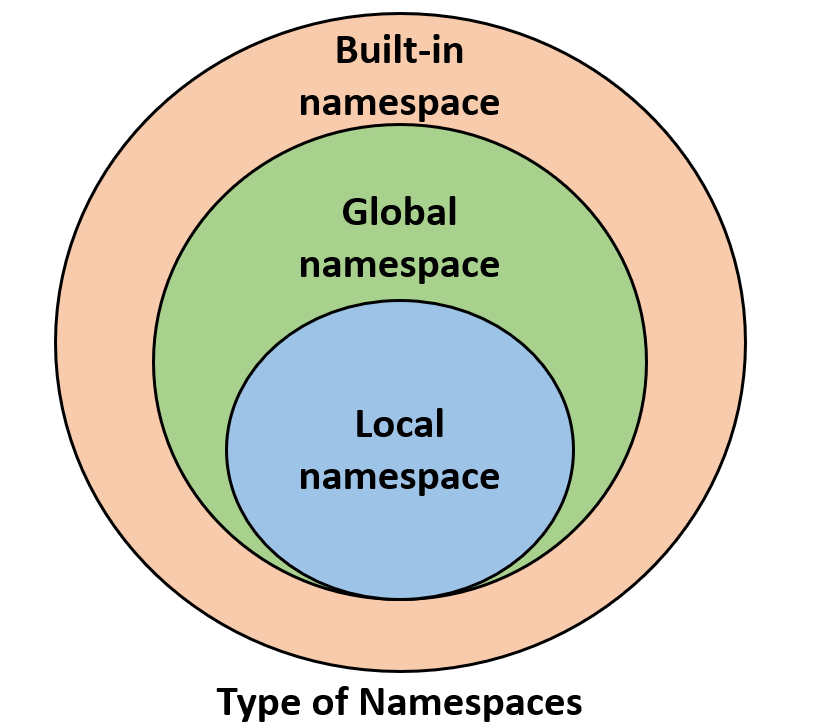

# Словари пространств имен

Ранее мы говорили, что пространства имен можно воспринимать как словари, в которых ключом является имя переменной, а значением - значение переменной.

На самом деле для глобальных и локальных пространств имен это абсолютно верно! Python действительно хранит эти пространства имен в виде словарей.

## Функция `globals`

`globals()`  - это встроенная функция Python, которая возвращает словарь, содержащий текущее глобальное пространство имен.

**Как это работает?**

Когда вы вызываете globals(), Python возвращает ссылку на словарь, который представляет собой текущее глобальное пространство имен.

Этот словарь содержит все глобальные переменные и функции, определенные в текущем скрипте или модуле.

Вы можете изменять этот словарь, добавляя новые элементы или изменяя существующие.


Рассмотрим это на примере:

In [20]:
type(globals())

dict

In [ ]:
globals()

Как видим, интерпретатор уже поместил некоторые переменные в глобальное пространство имен. В зависимости от версии Python, операционной системы и другого ПО, эти переменные могут слегка отличаться.



Теперь посмотрим как поменяется словарь при объявлении новой переменной:

In [21]:
x = 'foo'

In [ ]:
globals()

Как видим, после присвоения переменной `x = 'foo'`, новый элемент появился в словаре глобального пространства имен.

Обычно мы получаем доступ к данным, хранящимся в переменной, через имя этой переменной. Но кроме того мы можем менять и добавлять переменные не напрямую, а через словарь глобального пространства имен:

In [22]:
x

'foo'

In [23]:
d = globals()

In [24]:
d['x']

'foo'

In [25]:
x is globals()['x']

True

Попробуем добавить новую переменную:

In [28]:
globals()['y'] = 42

In [ ]:
globals()

In [29]:
y

42

In [30]:
globals()[' y  hello'] = 3.14159

In [ ]:
y

In [31]:
globals()[' y  hello']

3.14159

In [32]:
 y  hello

SyntaxError: invalid syntax (2153119544.py, line 1)

## Функция `locals`

`locals()` - это встроенная функция Python, которая возвращает словарь, содержащий текущее локальное пространство имен.

**Как это работает?**

Когда вы вызываете locals(), Python возвращает ссылку на словарь, который представляет собой текущее локальное пространство имен.

Этот словарь содержит все локальные переменные и функции, определенные в текущей функции или методе.

Вы можете изменять этот словарь, добавляя новые элементы или изменяя существующие.


In [35]:
(1)

1

In [36]:
x

NameError: name 'x' is not defined

In [37]:
help('keywords')


Here is a list of the Python keywords.  Enter any keyword to get more help.

False               class               from                or
None                continue            global              pass
True                def                 if                  raise
and                 del                 import              return
as                  elif                in                  try
assert              else                is                  while
async               except              lambda              with
await               finally             nonlocal            yield
break               for                 not                 



In [34]:
del (x)

In [33]:
def f(x, y):
    s = 'foo'
    print(locals())

In [39]:
f(10, 0.5)

{'x': 10, 'y': 0.5, 's': 'foo'}


Будучи вызванной внутри функции `f()`, `locals()` возвращает словарь, представляющий словарь локального пространства имен для этой функции.
Заметим, что кроме локально определенных переменных в нем так же присутствуют аргументы функции `x` и `y`, поскольку они тоже являются локальными для функции `f()`.

Если мы вызовем `locals()` вне функции, в основной программе, то получим такой же выход, как в `globals()`.

In [ ]:
globals() is locals()

Пример:

In [42]:
def some_function():
    x = 10  # Локальная переменная
    y = 20  # Локальная переменная

    print(locals())  # Выведет словарь с {'x': 10, 'y': 20}

    locals()['z'] = 30  # Добавляем новую локальную переменную
    print(locals())  # Выведет словарь с {'x': 10, 'y': 20, 'z': 30}

some_function()

{'x': 10, 'y': 20}
{'x': 10, 'y': 20, 'z': 30}


# Область видимости (scope)

Итак, при работе программы одновременно может быть куча пространств имен, в которых будут разные переменные с одинаковым именем.

**Вопрос** - когда мы обращаемся к переменной по имени, как Python понимает, к какой именно переменной мы обращаемся?

**Области видимости (scope)** в Python — это механизм, определяющий, где в программе можно использовать переменные и к каким именам можно получить доступ в различных частях кода. Python использует иерархическую структуру областей видимости для поиска переменных.

## Иерархия областей видимости: правило LEGB

Python ищет переменные в определённом порядке, который называют LEGB. Каждая буква обозначает уровень области видимости, на котором Python ищет переменные:

1. **L (Local)** - локальная область видимости. Это область видимости внутри функции. Переменные, объявленные внутри функции, существуют только в этой функции. Локальные переменные создаются при вызове функции и уничтожаются после завершения её выполнения.
2. **E (Enclosing)** - вложенная область видимости. Это область видимости для функций, находящихся внутри других функций (Что? Да! Об этом попозже). Переменные, объявленные во внешней функции, доступны и для вложенной функции.
3. **G (Global)** - глобальная область видимости. Это область видимости на уровне модуля. Переменные, объявленные в модуле (файле Python), существуют в глобальной области видимости для этого модуля.
4. **B (Built-in)** - встроенная область видимости. Это область, в которой находятся все встроенные функции и объекты Python, такие как `print()`, `len()`, `int()`, и т.д. Эти переменные (чаще всего функции) доступны везде в программе.

Python сначала ищет переменную в локальной области, затем во вложенной, затем в глобальной и, наконец, в встроенной области, если переменная не найдена в предыдущих областях.

Рассмотрим это правило на примере:

In [48]:
# x = 50  # Глобальная переменная

def outer_function():
    # x = 20  # Переменная в области видимости enclosing
    def inner_function():
        # x = 10  # Локальная переменная
        print(f"Локальная область: x = {x}")
    inner_function()
    print(f"Вложенная область: x = {x}")

outer_function()
print(f"Глобальная область: x = {x}")

NameError: name 'x' is not defined

## Статичность областей видимости

Пространства имен в Python являются статическими, т.е. Python анализирует код и создает нужные области видимости перед его выполнения. Рассмотрим пример:

In [49]:
x = 10  # Глобальная переменная

def outer_function():
    print(x)  # Переменной x в функции не определено - используем глобальную

    x = 2  # А теперь определяем x локально
    # Значит в функции outer_function все же обращаются к локальной, значит print выдаст ошибку

outer_function()

UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

Т.к. в функции `outer_function` имеется операция присвоения для переменной `x`, то Python понимает, что мы здесь хотим использовать локальную переменную, поэтому при попытке в этой же функции (пусть и ранее) вызвать `print(x)` мы получаем ошибку.

Аналогичная ошибка будет, если мы закомментируем `print(x)`:

In [50]:
x = 10  # Глобальная переменная

def outer_function():
    def inner_function():
        print(x)  # Нужна переменная x, на момент определения функции она ожидается в глобальном пространстве имен

    print(inner_function())
    x = 2  # А теперь определяем x локально
    # Значит в функции outer_function все же обращаются к локальной, значит print выдаст ошибку

outer_function()

NameError: cannot access free variable 'x' where it is not associated with a value in enclosing scope

В Python области видимости переменных определяются **в момент написания кода**, а не во время его выполнения.

То есть, когда вы создаёте функцию или программу, Python "смотрит" на расположение переменных и функций в коде и решает, где каждая переменная доступна.

## Специализированные ключевые слова

Как обойти LEGB? Для этого есть пара ключевых слов:

### Ключевое слово `global`

Ключевое слово *global* в Python используется для объявления переменных глобального scope. Оно позволяет изменять переменные, определенные вне функции, изнутри этой функции.

In [51]:
x = 20
y = 10

def f():
    global x, y
    x = 40
    print(x)

print("Before:", x)
f()
print("After:", x)

Before: 20
40
After: 40


Выражение `global x` показывает, что пока функция `f()` выполняется, все ссылки на переменную `x` будут относиться к `x` в глобальном пространстве имен.

То есть операция присвоения `x = 40` не создают новую переменную, а меняет переменную `x` в глобальной области видимости:

Аналогичные результаты мы могли бы получить с использованием функции `globals()`:

In [52]:
x = 20

def f():
    globals()['x'] = 40
    print(x)

print("Before:", x)
f()
print("After:", x)

Before: 20
40
After: 40


Принципиальной разницы этих двух подходов нет, разве что ключевое слово `global` делает код чище.

Если указанного имени нет в глобальном пространстве имен, то комбинация операции присвоения и ключевого слова `global` создадут ее:

In [ ]:
# Проверяем, что z нет
try:
    del z
except NameError:
    pass


def g():
    global z
    z = 20

g()
print("Now:", z)  # теперь есть

Давайте рассмотрим более сложный пример использования ключевого слова *global* в Python. Этот пример демонстрирует работу с несколькими глобальными переменными и вложенными функциями.

### Ключевое слово `nonlocal`

Ключевое слово *nonlocal* в Python используется для изменения переменных, определенных в более внешней области видимости. Вот основные моменты о nonlocal:

- Позволяет изменять переменные, определенные в более внешней области видимости функции.
- Используется внутри вложенных функций для доступа к переменным родительской функции.


In [ ]:
def f():
    x = 20

    def g():
        x = 40

    g()
    print(x)

f()

В этом случае первое определение x находится в оборачивающем пространстве, а не в глобальном. Функция `g()` не может напрямую изменять значения как в глобальной, так и в оборачивающей областях видимости.

`global` здесь тоже не поможет:

In [ ]:
del x

In [ ]:
def f():
    x = 20

    def g():
        global x
        x = 40

    g()
    print(x)

In [ ]:
f()

In [ ]:
x

Поэтому в таких ситуациях используют ключевое слово `nonlocal` - интерпретатор будет искать переменную в ближайшем оборачивающем пространстве имен:

In [ ]:
def f():
    x = 20

    def g():
        nonlocal x
        x = 40

    g()
    print(x)

In [ ]:
f()

# А что с изменением вместо присваивания?

Все трюки с пространствами имен завязаны именно на операцию присваивания, но не на другие способы изменить объекты:

In [53]:
l = [0, 1]

def f():
    def g():
        l.append(0)  # Спокойно меняем глобальную переменную
        print("Inside:", l)

    g()

f()

print("Outside:", l)

Inside: [0, 1, 0]
Outside: [0, 1, 0]


А если скопируем внутри?

In [54]:
l = [0, 1]


def f():
    def g():
        l = l[:].append(0)  # До выполнения ссылались на глобальную переменную, затем - на локальную, так нельзя!
        print(l)

    g()

f()

UnboundLocalError: cannot access local variable 'l' where it is not associated with a value

# Чем могут быть полезны вложенные функции?

Вложенные функции могут быть полезны в следующим случаях:

### Инкапсуляция логики

Когда нужна вспомогательная функция, которая будет использоваться только внутри другой функции, нет необходимости объявлять её глобально:

In [ ]:
def process_data(data):
    def clean_data(d):
        # Вспомогательная функция для очистки данных
        return [item.strip() for item in d]

    def transform_data(d):
        # Вспомогательная функция для трансформации данных
        return [item.upper() for item in d]

    cleaned_data = clean_data(data)
    transformed_data = transform_data(cleaned_data)
    return transformed_data

data = ["   apple   ", "   banana   ", "   cherry   "]
print(process_data(data))
# Вывод: ['APPLE', 'BANANA', 'CHERRY']